# YOLO

In [1]:
# Pip install method (recommended)
# !pip install ultralytics==8.0.196
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


# Entrenamiento del Modelo

In [ ]:
!pip install roboflow

from roboflow import Roboflow
from apiroboflow import APIKEY
rf = Roboflow(api_key= APIKEY)
project = rf.workspace("dataset-gn61s").project("placas-jfwvo-j2rm7")
version = project.version(1)
dataset = version.download("yolov8")

In [3]:
from ultralytics import YOLO
from IPython.display import display, Image

In [4]:
HOME = '/content'
%cd {HOME}

# Si descargan de roboflow data= /{HOME}/nombrecarpeta/data.yaml
!yolo task=detect mode=train model=yolov8s.pt data={HOME}/Placas-1/data.yaml epochs=100 imgsz=640

/content
100% 21.5M/21.5M [00:00<00:00, 105MB/s] 
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Placas-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

/content


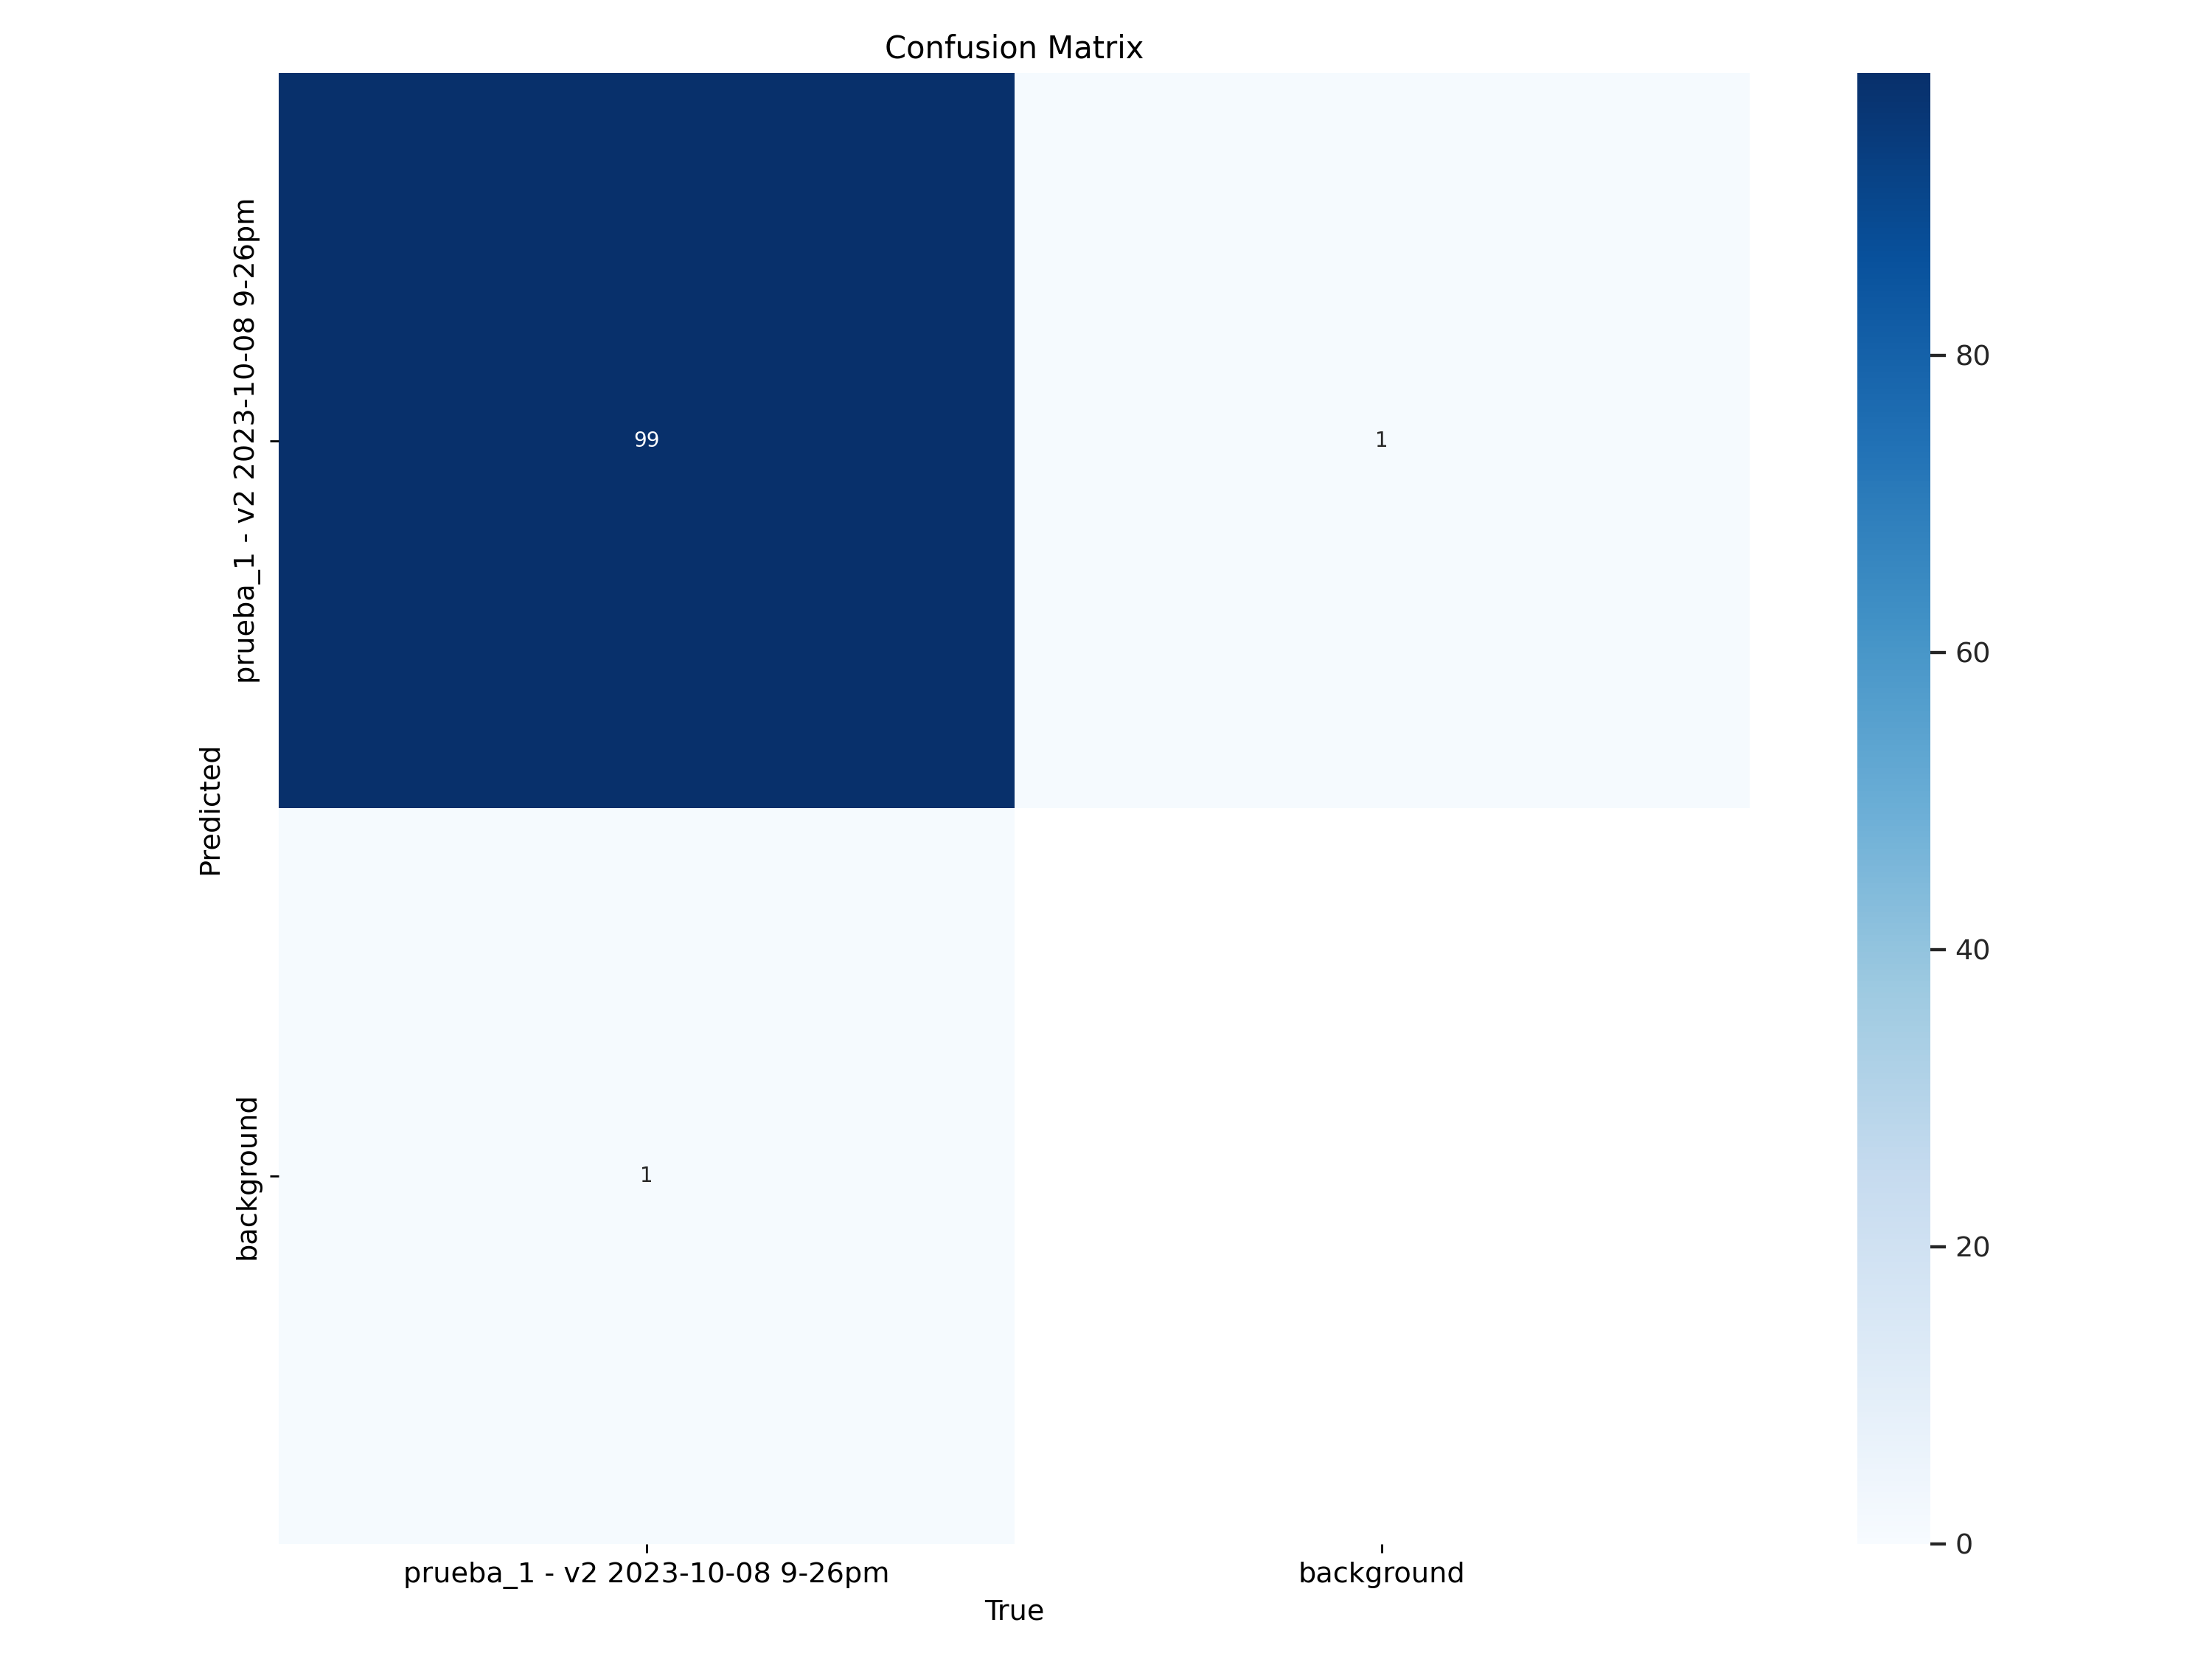

In [5]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

/content


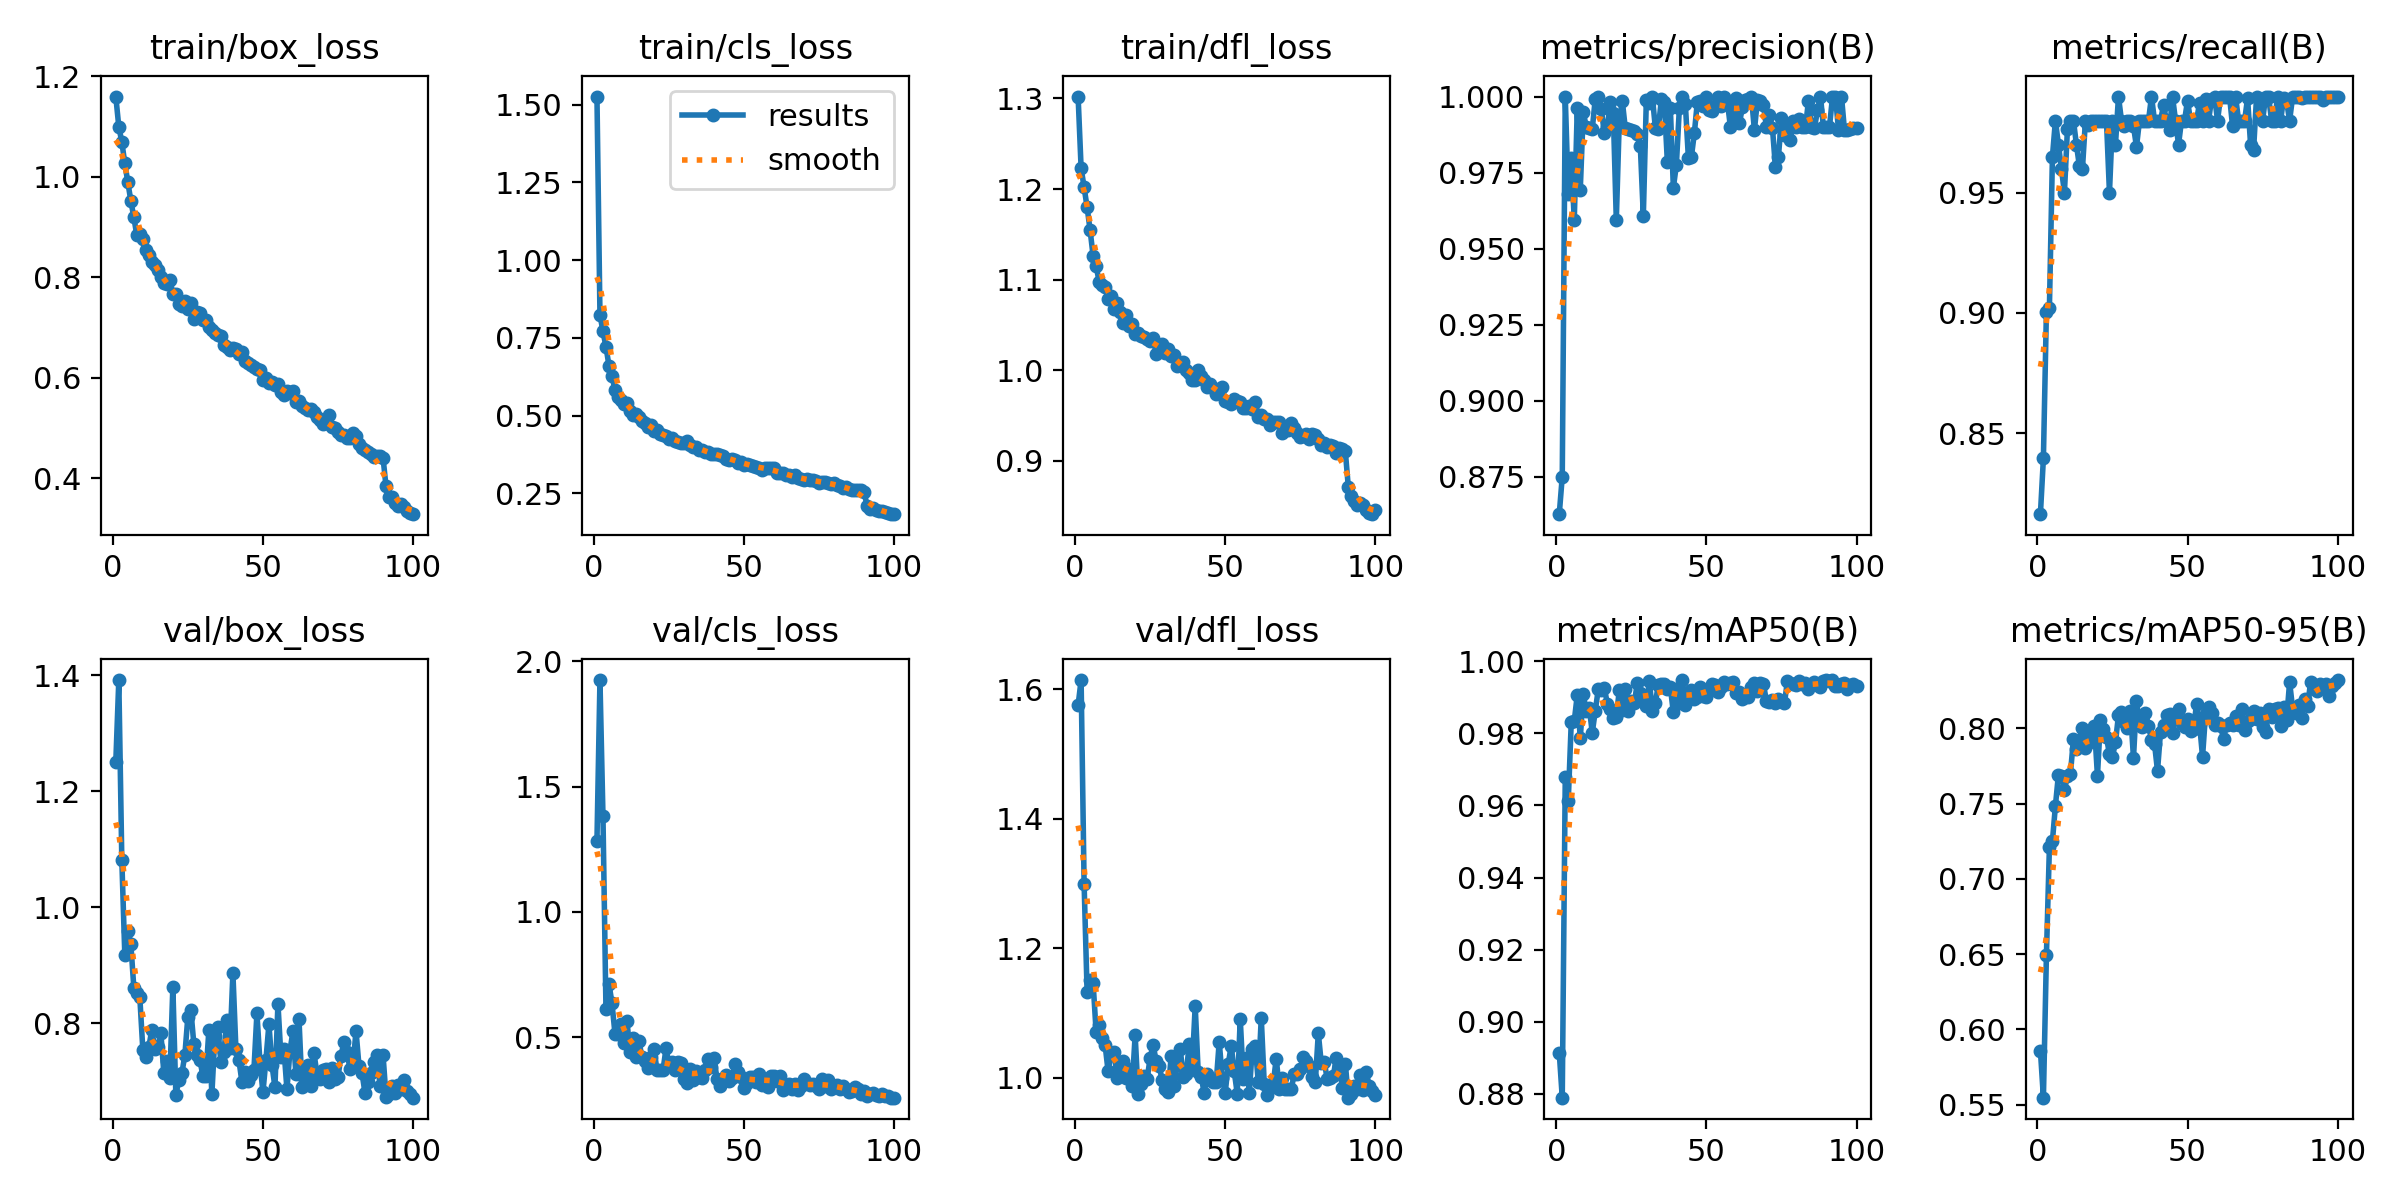

In [6]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1600)

Validar

In [7]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={HOME}/Placas-1/data.yaml

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Placas-1/valid/labels.cache... 99 images, 0 backgrounds, 0 corrupt: 100% 99/99 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 95, len(boxes) = 100. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:03<00:00,  1.99it/s]
                   all         99        100       0.99       0.99      0.993      0.833
Speed: 7.1ms preprocess, 10.4ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [8]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.7 source={HOME}/ej_car.png save=True

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/ej_car.png: 448x640 1 prueba_1 - v2 2023-10-08 9-26pm, 42.7ms
Speed: 2.6ms preprocess, 42.7ms inference, 150.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [9]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.7 source={HOME}/ej_car2.png save=True

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/ej_car2.png: 640x640 1 prueba_1 - v2 2023-10-08 9-26pm, 16.3ms
Speed: 12.0ms preprocess, 16.3ms inference, 198.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [10]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.7 source={HOME}/ej_car3.png save=True

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/ej_car3.png: 384x640 (no detections), 37.4ms
Speed: 3.2ms preprocess, 37.4ms inference, 19.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [11]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.7 source={HOME}/ej_car4.png save=True
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.7 source={HOME}/ej_car5.png save=True
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.7 source={HOME}/ej_car6.jpg save=True
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.7 source={HOME}/ej_car7.jpg save=True

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/ej_car4.png: 448x640 1 prueba_1 - v2 2023-10-08 9-26pm, 42.0ms
Speed: 3.8ms preprocess, 42.0ms inference, 143.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/ej_car5.png: 448x640 1 prueba_1 - v2 2023-10-08 9-26pm, 104.1ms
Speed: 5.1ms preprocess, 104.1ms inference, 360.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 laye

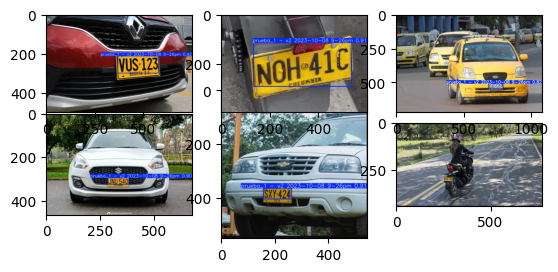

In [13]:
import matplotlib.pyplot as plt

im1 = plt.imread('/content/runs/detect/predict/ej_car.jpg')
plt.subplot(131)
plt.imshow(im1)

im2 = plt.imread('/content/runs/detect/predict2/ej_car2.jpg')
plt.subplot(132)
plt.imshow(im2)

im3 = plt.imread('/content/runs/detect/predict3/ej_car3.jpg')
plt.subplot(133)
plt.imshow(im3)

im4 = plt.imread('/content/runs/detect/predict4/ej_car4.jpg')
plt.subplot(231)
plt.imshow(im4)

im5 = plt.imread('/content/runs/detect/predict5/ej_car5.jpg')
plt.subplot(232)
plt.imshow(im5)

im6 = plt.imread('/content/runs/detect/predict6/ej_car7.jpg')
plt.subplot(233)
plt.imshow(im6)



In [14]:
import cv2
import numpy as np

def draw_yolo_results(frame,results,threshold=0.5):
  for i, result in enumerate(results.boxes.data.tolist()):
    x1, y1, x2, y2, score, class_id = result
    print(score)

    if score > threshold:
      x1,y1,x2,y2 = int(x1), int(y1), int(x2), int(y2)
      print('Coordenadas de la BB: ',x1,y1,x2,y2)
      print('Confianza: ', score)
      print('Etiqueta: ', class_id)

      # Sobre las filas para que no quede por fuera el rectangulo
      cv2.rectangle(frame, (x1,y1),(x2,y2), (255,0,0), 2)
      cv2.putText(frame, str(class_id), (x1,y1-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 3, cv2.LINE_AA)
      color = np.random.randint(0,250, (3,), dtype= np.uint8)

  return frame

In [45]:
import cv2
import numpy as np

def draw_yolo_results(frame,results,threshold=0.4):
  for i, result in enumerate(results.boxes.data.tolist()):
    x1, y1, x2, y2, score, class_id = result
    print(score)

    if score > threshold:
      x1,y1,x2,y2 = int(x1), int(y1), int(x2), int(y2)
      print('Coordenadas de la BB: ',x1,y1,x2,y2)
      print('Confianza: ', score)
      print('Etiqueta: ', class_id)

      # Sobre las filas para que no quede por fuera el rectangulo
      cv2.rectangle(frame, (x1,y1),(x2,y2), (255,0,0), 2)
      cv2.putText(frame, str(class_id), (x1,y1-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 3, cv2.LINE_AA)
      color = np.random.randint(0,250, (3,), dtype= np.uint8)

  return frame

In [16]:
from google.colab.patches import cv2_imshow

In [17]:
model = YOLO('/content/runs/detect/train/weights/best.pt')


0: 448x640 1 prueba_1 - v2 2023-10-08 9-26pm, 13.2ms
Speed: 4.2ms preprocess, 13.2ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)
0.7891748547554016
Coordenadas de la BB:  285 295 382 323
Confianza:  0.7891748547554016
Etiqueta:  0.0


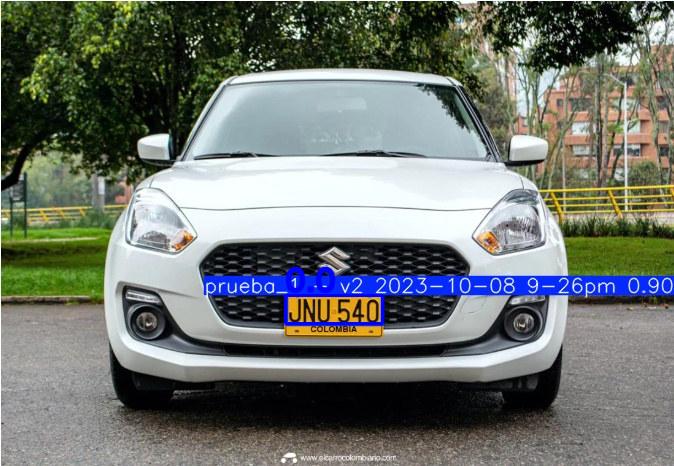

In [46]:
frame = cv2.imread('/content/runs/detect/predict/ej_car.jpg')
results = model.predict(frame)[0]
imagen = draw_yolo_results(frame, results)
cv2_imshow(imagen)


0: 640x640 1 prueba_1 - v2 2023-10-08 9-26pm, 17.2ms
Speed: 3.8ms preprocess, 17.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
0.8892660737037659
Coordenadas de la BB:  159 368 261 407
Confianza:  0.8892660737037659
Etiqueta:  0.0


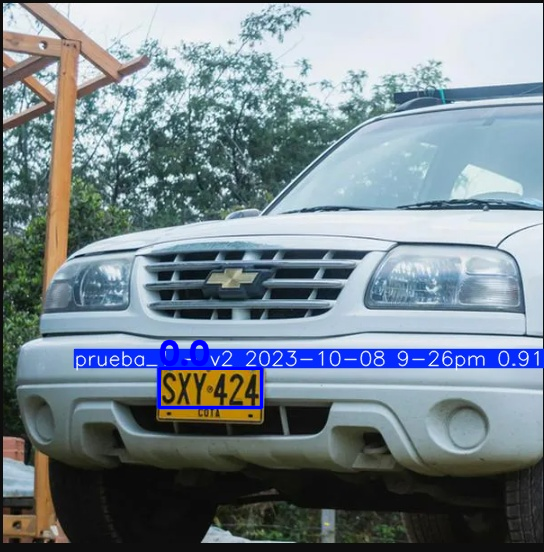

In [47]:
frame = cv2.imread('/content/runs/detect/predict2/ej_car2.jpg')
results = model.predict(frame)[0]
imagen = draw_yolo_results(frame, results)
cv2_imshow(imagen)


0: 384x640 1 prueba_1 - v2 2023-10-08 9-26pm, 11.5ms
Speed: 2.8ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
0.41621604561805725
Coordenadas de la BB:  252 286 298 303
Confianza:  0.41621604561805725
Etiqueta:  0.0


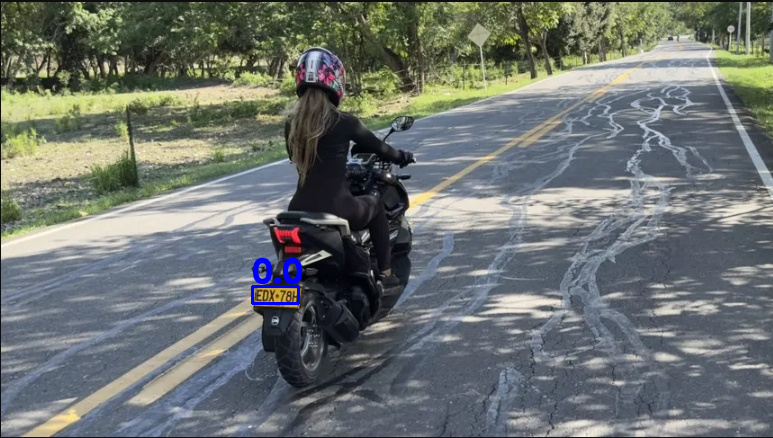

In [48]:
frame = cv2.imread('/content/runs/detect/predict3/ej_car3.jpg')
results = model.predict(frame)[0]
imagen = draw_yolo_results(frame, results)
cv2_imshow(imagen)


0: 448x640 1 prueba_1 - v2 2023-10-08 9-26pm, 14.0ms
Speed: 3.9ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
0.9163927435874939
Coordenadas de la BB:  370 213 577 302
Confianza:  0.9163927435874939
Etiqueta:  0.0


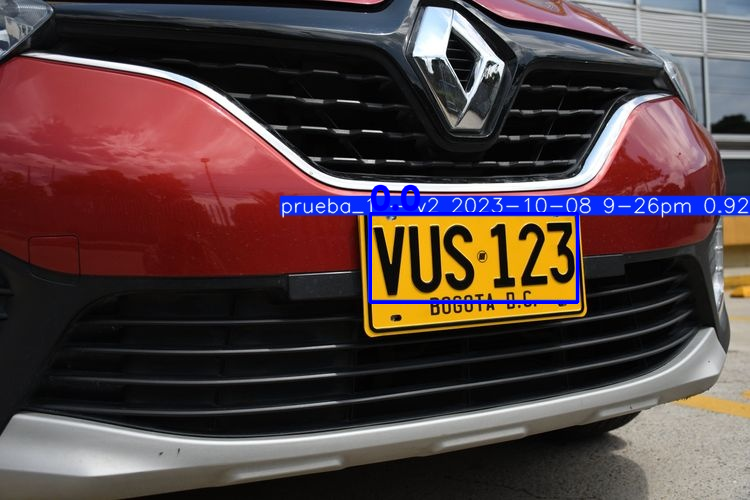

In [49]:
frame = cv2.imread('/content/runs/detect/predict4/ej_car4.jpg')
results = model.predict(frame)[0]
imagen = draw_yolo_results(frame, results)
cv2_imshow(imagen)


0: 448x640 1 prueba_1 - v2 2023-10-08 9-26pm, 13.0ms
Speed: 2.6ms preprocess, 13.0ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
0.9040706157684326
Coordenadas de la BB:  133 124 535 284
Confianza:  0.9040706157684326
Etiqueta:  0.0


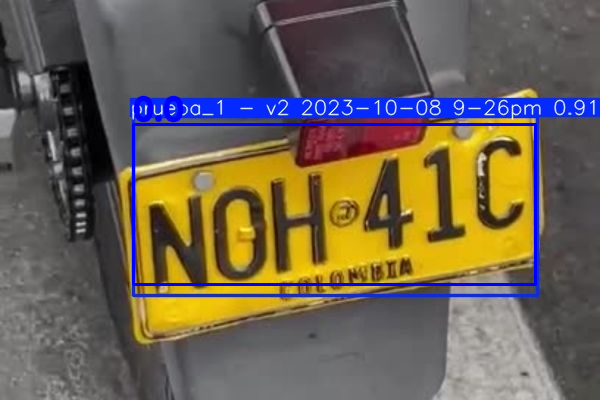

In [50]:
frame = cv2.imread('/content/runs/detect/predict5/ej_car5.jpg')
results = model.predict(frame)[0]
imagen = draw_yolo_results(frame, results)
cv2_imshow(imagen)


0: 448x640 (no detections), 13.0ms
Speed: 2.8ms preprocess, 13.0ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


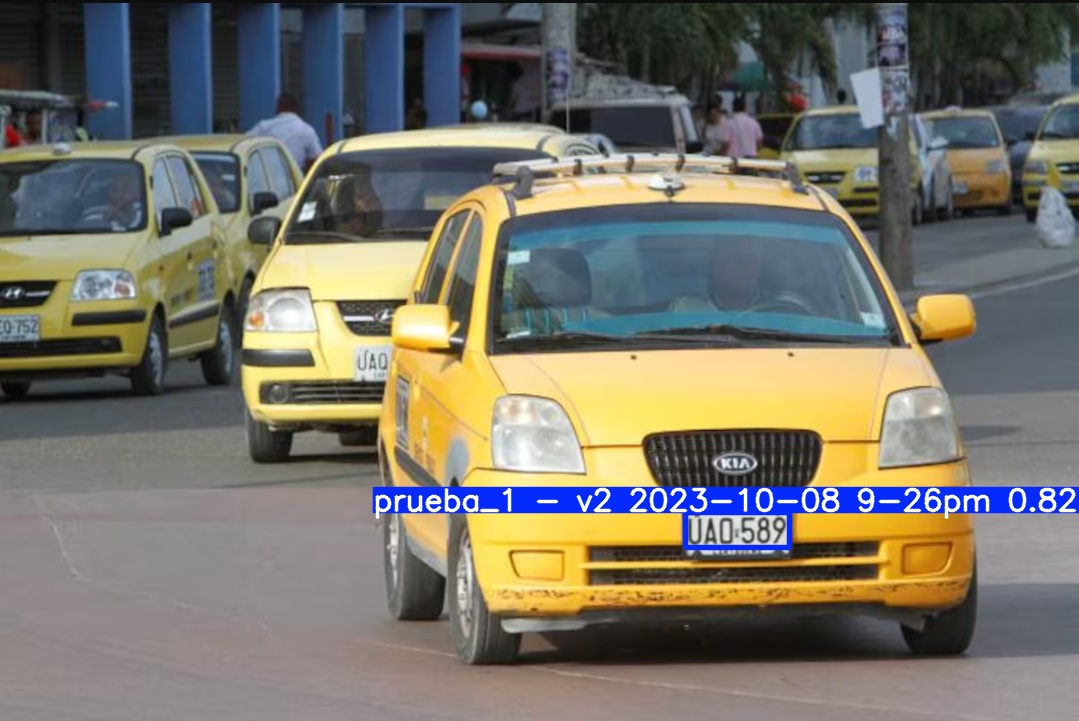

In [51]:
frame = cv2.imread('/content/runs/detect/predict6/ej_car7.jpg')
results = model.predict(frame)[0]
imagen = draw_yolo_results(frame, results)
cv2_imshow(imagen)